#### 쇼핑몰
- 온라인 리테일 사이트의 2010/12 ~ 2011/12 주문기록 데이터
- 500,000건 데이터

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# # 한글폰트
# plt.rcParams["font.family"] = "Malgun Gothic"
# # - 요소 설정
# plt.rcParams["axes.unicode_minus"] = False
import koreanize_matplotlib

import warnings
warnings.simplefilter("ignore")

In [6]:
# 데이터 로드
retail_df = pd.read_excel("./resources/Online Retail.xlsx")
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


- InvoiceNo : 주문번호
- StockCode : 상품코드
- Description : 상품 상세설명
- Quantity : 주문수량
- InvoiceDate : 주문시각
- UnitPrice : 상품가격
- CustomerID : 주문자 아이디
- Country : 고객 거주 지역(국가)



In [7]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
retail_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [9]:
retail_df.shape

(541909, 8)

In [10]:
# 데이터 전처리(data cleaning)
# null, 가격0원, 수량 - 값 해결

# null 합계
retail_df.isnull().sum()

# Customer ID가 NaN인 데이터 조회
# retail_df[retail_df["CustomerID"].isna()]

# CustomerID null 제거
# retail_df.dropna(subset=["CustomerID"])

retail_df = retail_df[~retail_df["CustomerID"].isna()]
retail_df = retail_df[retail_df["CustomerID"].notna()]
retail_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
retail_df.shape

(406829, 8)

In [12]:
# 수량, 가격이 > 0 데이터 조회
retail_df.query("Quantity > 0").shape[0]
retail_df.query("UnitPrice > 0").shape[0]

406789

In [13]:
# 수량, 가격이 > 0 데이터 조회
retail_df = retail_df[retail_df["Quantity"]>0]
retail_df = retail_df[retail_df["UnitPrice"]>0]
retail_df.shape

(397884, 8)

In [14]:
# 컬럼별 전체 타입 확인
retail_df.dtypes

# CostomerID 데이터 타입 변경: int32
# astype() or pd.to_numeric()

retail_df["CustomerID"] = retail_df["CustomerID"].astype("int32")
retail_df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int32
Country                object
dtype: object

In [15]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.8+ MB


In [16]:
# 고객총지출비용 = 수량 * 금액
# CheckoutPrice = 

retail_df["CheckoutPrice"]= retail_df["Quantity"] * retail_df["UnitPrice"]
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [17]:
retail_df.to_csv("./resources/OnlineRetailClean.csv", index=False)

In [18]:
dtypes = {
    "Quantity" : np.int32,
    "UnitPrice" : np.float32,
    "CustomerID" : np.int32
}
retail_df_new = pd.read_csv("./resources/OnlineRetailClean.csv",dtype=dtypes)
retail_df_new

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
397879,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397880,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [19]:
retail_df_new.dtypes

InvoiceNo          int64
StockCode         object
Description       object
Quantity           int32
InvoiceDate       object
UnitPrice        float32
CustomerID         int32
Country           object
CheckoutPrice    float64
dtype: object

In [20]:
# 매출 분석 - 전체, 국가별, 월 별, 요일별, 시간별

# 전체 매출액
retail_df_new.head()
retail_df_new["CheckoutPrice"].sum()
sum(retail_df_new["CheckoutPrice"])

8911407.904

In [21]:
# 국가별 매출

retail_df_new.head(3)

# Country가 index 역할
# retail_df_new.groupby("Country")[["CheckoutPrice"]].sum().sort_values("CheckoutPrice",ascending=False)

rev_by_contries = retail_df_new.groupby("Country")["CheckoutPrice"].sum().sort_values(ascending=False)
rev_by_contries

Country
United Kingdom          7308391.554
Netherlands              285446.340
EIRE                     265545.900
Germany                  228867.140
France                   209024.050
Australia                138521.310
Spain                     61577.110
Switzerland               56443.950
Belgium                   41196.340
Sweden                    38378.330
Japan                     37416.370
Norway                    36165.440
Portugal                  33439.890
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20450.440
Denmark                   18955.340
Italy                     17483.240
Cyprus                    13590.380
Austria                   10198.680
Poland                     7334.650
Israel                     7221.690
Greece                     4760.520
Iceland                    4310.000
Canada                     3666.380
USA                        3580.390
Malta                      2725.590
Unspecified         

In [22]:
COLOR = sns.color_palette()
COLOR

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

[Text(0, 0, 'United Kingdom'),
 Text(1, 0, 'Netherlands'),
 Text(2, 0, 'EIRE'),
 Text(3, 0, 'Germany'),
 Text(4, 0, 'France'),
 Text(5, 0, 'Australia'),
 Text(6, 0, 'Spain'),
 Text(7, 0, 'Switzerland'),
 Text(8, 0, 'Belgium'),
 Text(9, 0, 'Sweden'),
 Text(10, 0, 'Japan'),
 Text(11, 0, 'Norway'),
 Text(12, 0, 'Portugal'),
 Text(13, 0, 'Finland'),
 Text(14, 0, 'Singapore'),
 Text(15, 0, 'Channel Islands'),
 Text(16, 0, 'Denmark'),
 Text(17, 0, 'Italy'),
 Text(18, 0, 'Cyprus'),
 Text(19, 0, 'Austria'),
 Text(20, 0, 'Poland'),
 Text(21, 0, 'Israel'),
 Text(22, 0, 'Greece'),
 Text(23, 0, 'Iceland'),
 Text(24, 0, 'Canada'),
 Text(25, 0, 'USA'),
 Text(26, 0, 'Malta'),
 Text(27, 0, 'Unspecified'),
 Text(28, 0, 'United Arab Emirates'),
 Text(29, 0, 'Lebanon'),
 Text(30, 0, 'Lithuania'),
 Text(31, 0, 'European Community'),
 Text(32, 0, 'Brazil'),
 Text(33, 0, 'RSA'),
 Text(34, 0, 'Czech Republic'),
 Text(35, 0, 'Bahrain'),
 Text(36, 0, 'Saudi Arabia')]

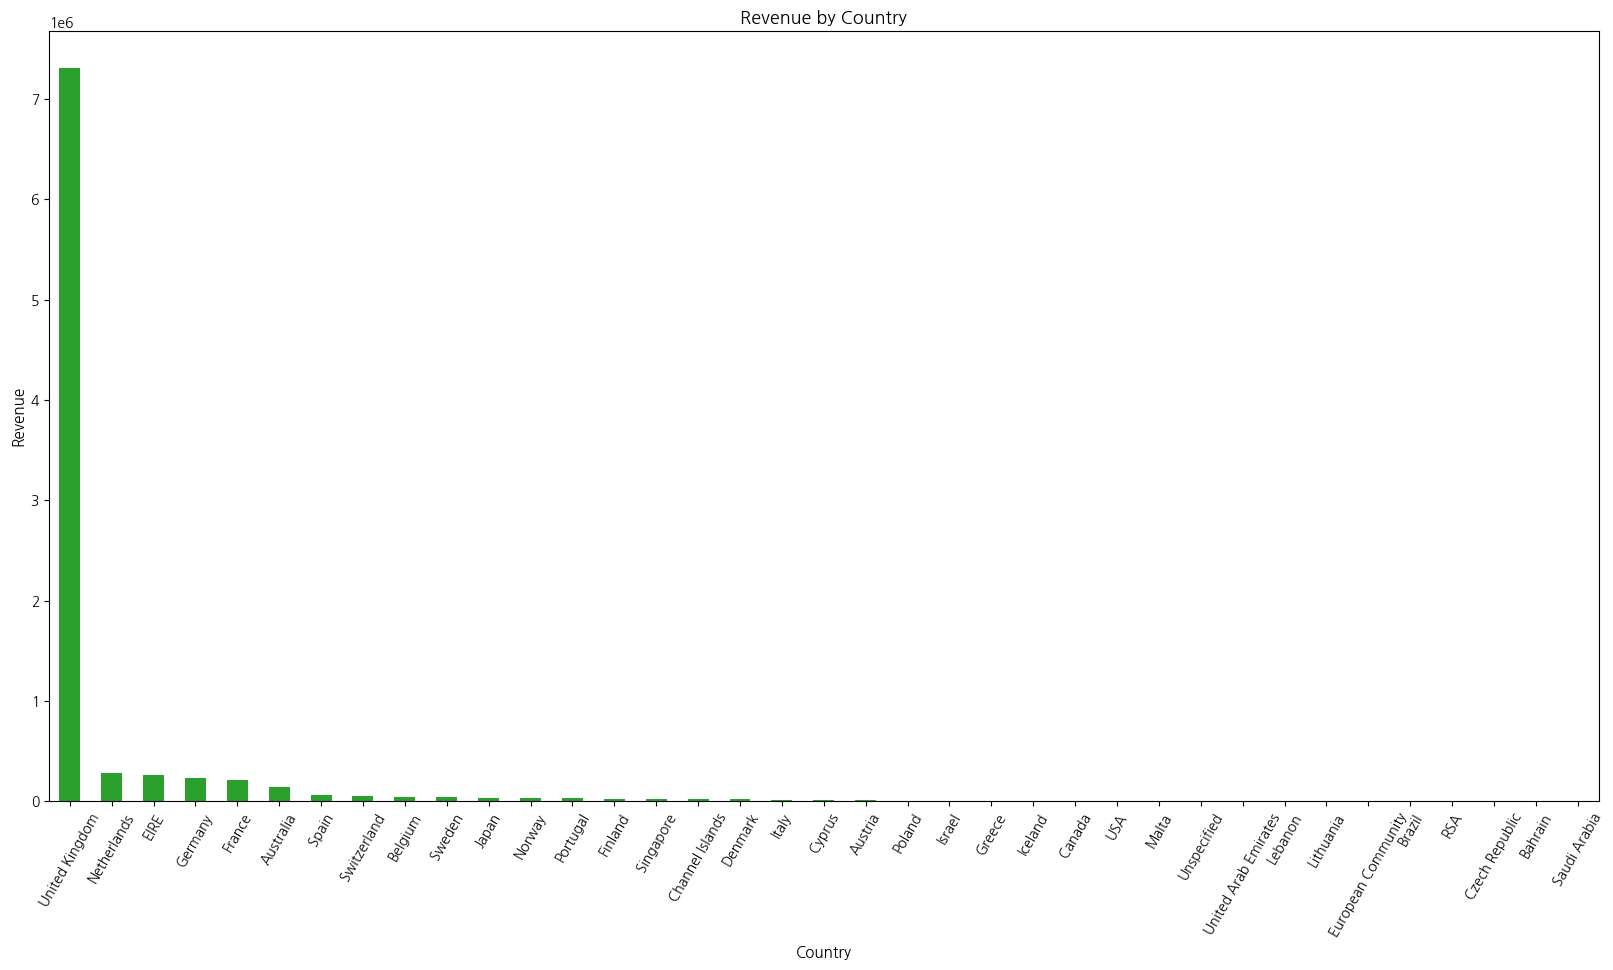

In [23]:
# 국가별 매출 그래프

# rev_by_contries.plot.bar()
g = rev_by_contries.plot(kind="bar", figsize=(20,10), color=COLOR[2])
g.set_xlabel("Country", fontsize=11)
g.set_ylabel("Revenue", fontsize=11)
g.set_title("Revenue by Country", fontsize=13)
g.set_xticklabels(labels=rev_by_contries.index, rotation=60)

In [24]:
# 국가별 매출액 점유율 확인
total_revenue = sum(retail_df_new["CheckoutPrice"])
rev_by_contries/total_revenue

Country
United Kingdom          0.820116
Netherlands             0.032032
EIRE                    0.029798
Germany                 0.025682
France                  0.023456
Australia               0.015544
Spain                   0.006910
Switzerland             0.006334
Belgium                 0.004623
Sweden                  0.004307
Japan                   0.004199
Norway                  0.004058
Portugal                0.003752
Finland                 0.002530
Singapore               0.002388
Channel Islands         0.002295
Denmark                 0.002127
Italy                   0.001962
Cyprus                  0.001525
Austria                 0.001144
Poland                  0.000823
Israel                  0.000810
Greece                  0.000534
Iceland                 0.000484
Canada                  0.000411
USA                     0.000402
Malta                   0.000306
Unspecified             0.000299
United Arab Emirates    0.000213
Lebanon                 0.000190
Li

In [114]:
# 차트작성 함수화

def plot_bar(df, xlabel, ylabel, title, figsize=(20,10), color=COLOR[-1], rotation=60):
    g = df.plot(kind="bar", figsize=figsize, color=color, rot=rotation)
    g.set_xlabel(xlabel, fontsize=11)
    g.set_ylabel(ylabel, fontsize=11)
    g.set_title(title, fontsize=13)

In [26]:
# 월별 매출

retail_df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [86]:
# InvoiceDate(object) => datetime 타입 변경
retail_df_new["InvoiceDate"] = pd.to_datetime(retail_df_new["InvoiceDate"])
retail_df_new.dtypes

InvoiceNo                 int64
StockCode                object
Description              object
Quantity                  int32
InvoiceDate      datetime64[ns]
UnitPrice               float32
CustomerID                int32
Country                  object
CheckoutPrice           float64
dtype: object

In [87]:
retail_df_new

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
397879,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397880,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [89]:
ser1 = pd.Series(pd.Timestamp('2010-01-01 08:26:00'))
ser1

# 201012 201001

0   2010-01-01 08:26:00
dtype: datetime64[ns]

In [90]:
def extract_month(date):
    # print(date.dt.year)
    # print(date.dt.month)
    month=str(date.month)
    if date.month < 10:
        month= "0"+month
    return str(date.year) + month

In [97]:
# extract_month(ser1)

In [106]:
retail_df_new.dtypes

InvoiceNo                 int64
StockCode                object
Description              object
Quantity                  int32
InvoiceDate      datetime64[ns]
UnitPrice               float32
CustomerID                int32
Country                  object
CheckoutPrice           float64
dtype: object

In [96]:
rev_by_month = retail_df_new.set_index("InvoiceDate").groupby(extract_month).sum()['CheckoutPrice']
rev_by_month

InvoiceDate
201012     572713.890
201101     569445.040
201102     447137.350
201103     595500.760
201104     469200.361
201105     678594.560
201106     661213.690
201107     600091.011
201108     645343.900
201109     952838.382
201110    1039318.790
201111    1161817.380
201112     518192.790
Name: CheckoutPrice, dtype: float64

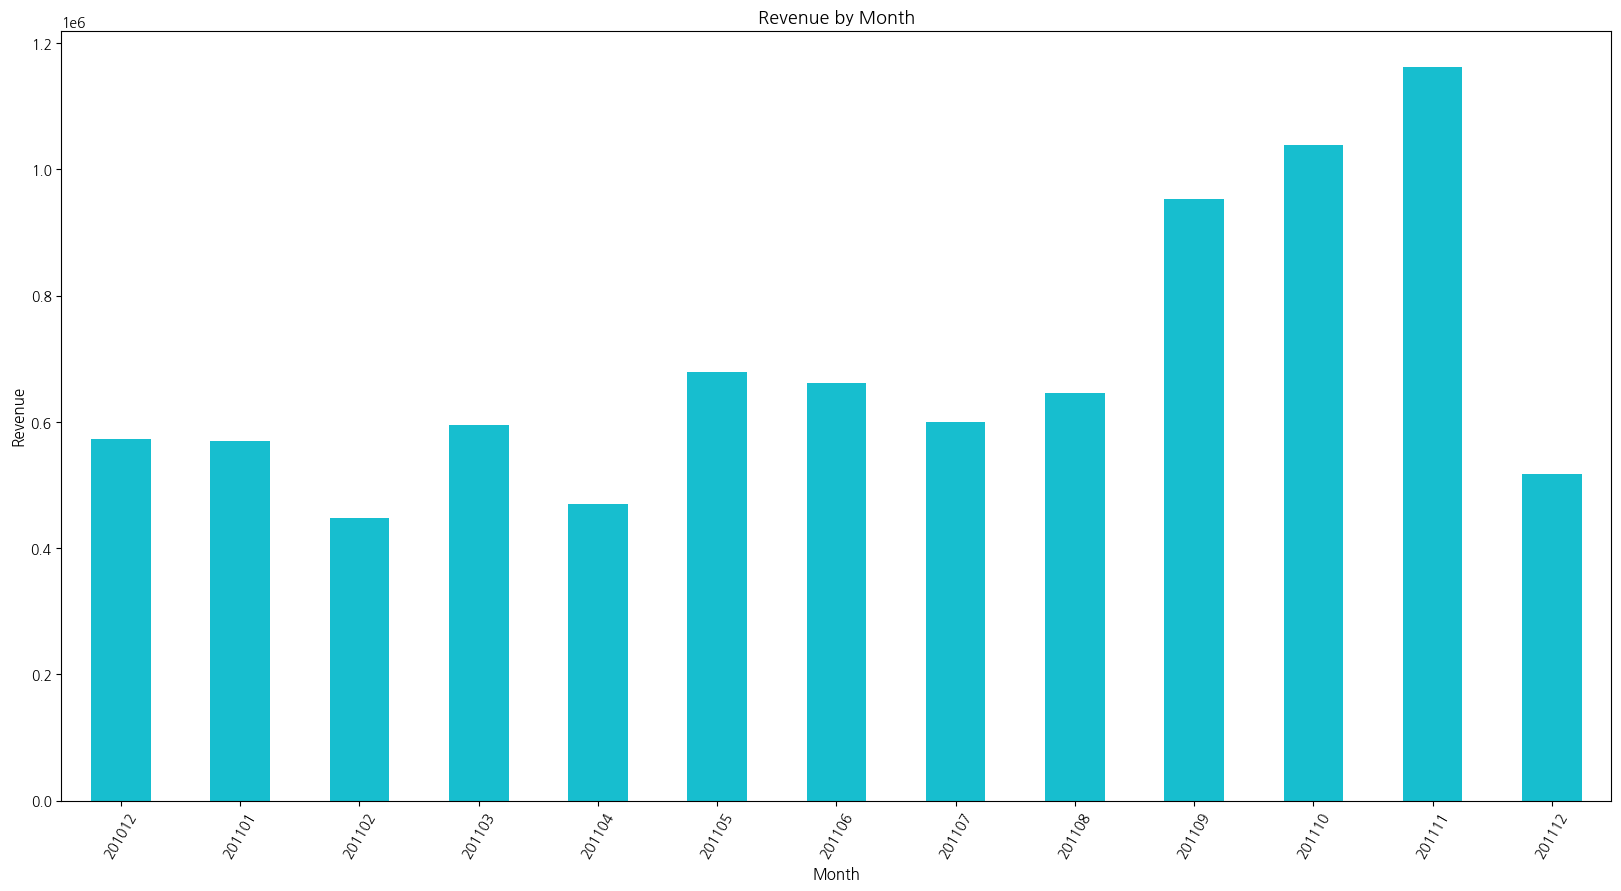

In [115]:
plot_bar(rev_by_month,"Month","Revenue","Revenue by Month")

In [123]:
# 요일별 매출

date = pd.to_datetime('2025-02-06')
# 0:월요일 ~ 6:일요일
date.day_of_week

3

In [124]:
rev_by_dow = retail_df_new.set_index("InvoiceDate").groupby(lambda date:date.dayofweek)['CheckoutPrice'].sum()
rev_by_dow

InvoiceDate
0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: CheckoutPrice, dtype: float64

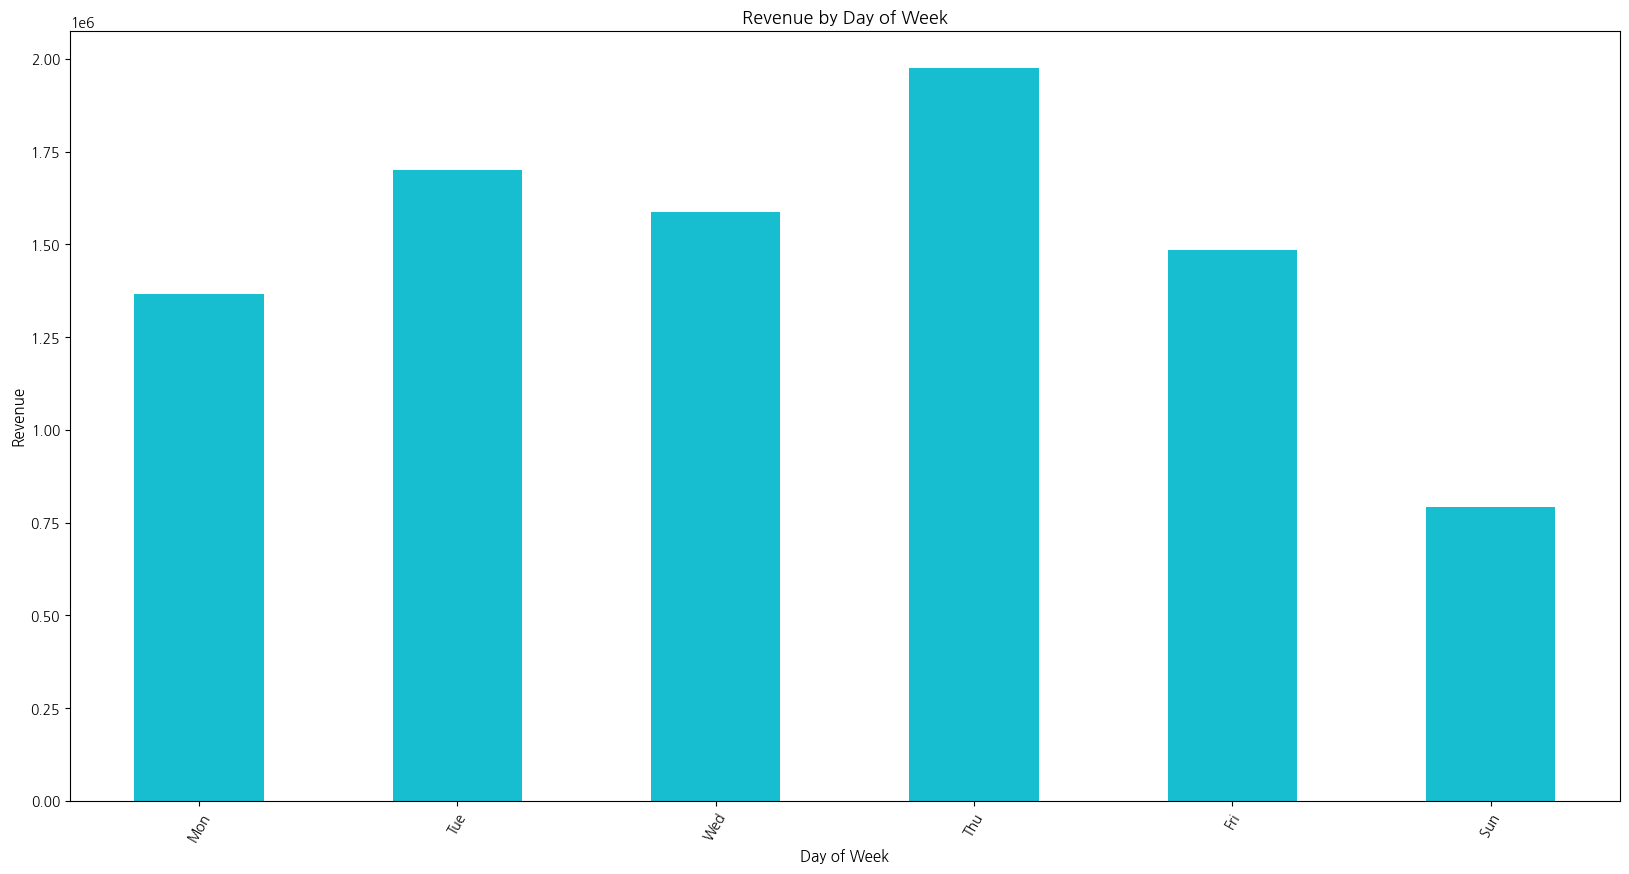

In [125]:
DAY_OF_WEEK = np.array(["Mon", "Tue","Wed","Thu","Fri","Sat","Sun"])

rev_by_dow.index = DAY_OF_WEEK[rev_by_dow.index]

plot_bar(rev_by_dow, "Day of Week", "Revenue", "Revenue by Day of Week")

In [126]:
rev_by_hour = retail_df_new.set_index("InvoiceDate").groupby(lambda date:date.hour)['CheckoutPrice'].sum()
rev_by_hour

InvoiceDate
6           4.250
7       31059.210
8      282115.630
9      842605.171
10    1261192.571
11    1104558.750
12    1378571.480
13    1173264.750
14     995629.371
15     966191.750
16     468885.800
17     234413.521
18     104954.430
19      49028.460
20      18932.760
Name: CheckoutPrice, dtype: float64

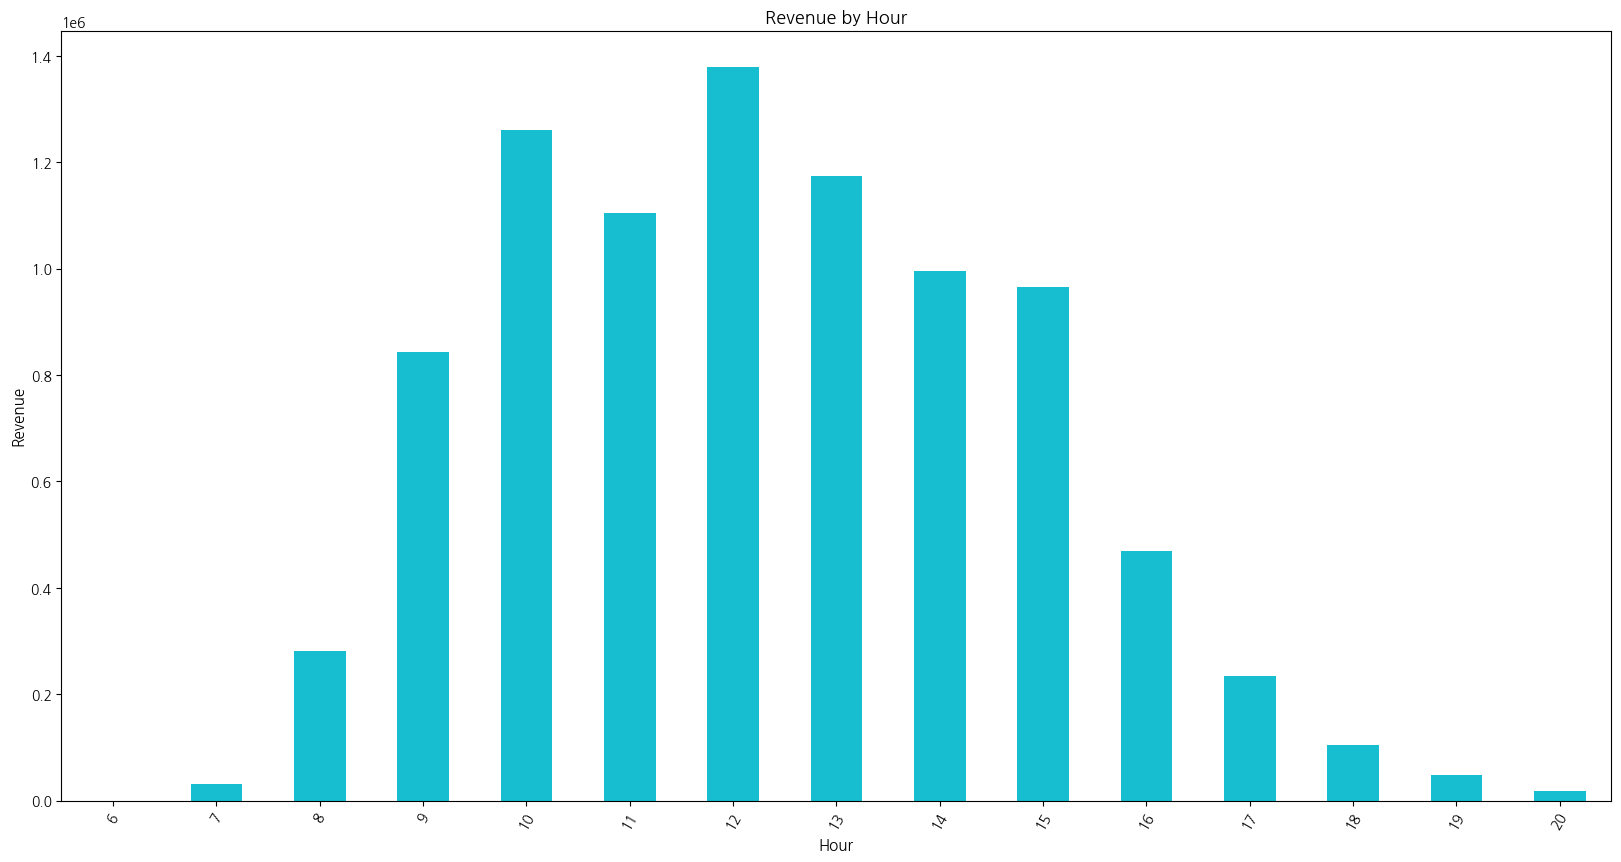

In [ ]:
plot_bar(rev_by_hour, "Hour", "Revenue", "Revenue by Hour")

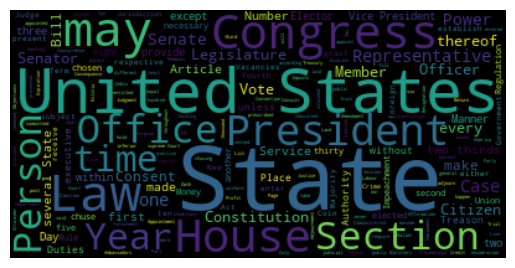

In [130]:
from wordcloud import WordCloud

text = open("./resources/constitution.txt").read()

wordcloud = WordCloud().generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

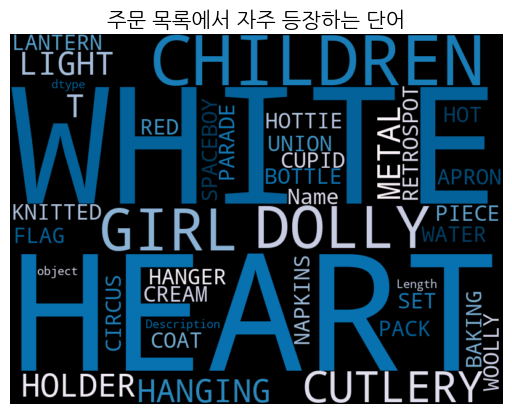

In [135]:
retail_df_new["Description"]
wordcloud = WordCloud(width=800, height=600, colormap="PuBu").generate(str(retail_df_new["Description"]))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("주문 목록에서 자주 등장하는 단어", fontsize=15)
plt.axis("off")
plt.show()

In [137]:
# 우수고객 확인 - 구매 횟수, 지불금액
retail_df_new

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
397879,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397880,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [ ]:
# retail_df_new["best"] = retail_df_new["Quantity"] * retail_df_new["CheckoutPrice"]
retail_df_new.groupby("CustomerID")["Quantity"].count().sort_values(ascending=False)

CustomerID
17841    7847
14911    5675
14096    5111
12748    4595
14606    2700
         ... 
18184       1
18233       1
13099       1
18268       1
12346       1
Name: Quantity, Length: 4338, dtype: int64

In [142]:
retail_df_new.groupby("CustomerID")["CheckoutPrice"].sum().sort_values(ascending=False)

CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
           ...    
16878        13.30
17956        12.75
16454         6.90
14792         6.20
16738         3.75
Name: CheckoutPrice, Length: 4338, dtype: float64

In [144]:
# retention : 특정 기간동안 활성화된 고객의 수
from datetime import datetime

def get_month_as_datetime(date):
    return datetime(date.year, date.month, 1)

In [145]:
retail_df_new["Month"] = retail_df_new["InvoiceDate"].apply(get_month_as_datetime)
retail_df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,best,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,91.80,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,122.04,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,176.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,122.04,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,122.04,2010-12-01


In [146]:
# 사용자가 최초 구매한 월
retail_df_new["MonthStarted"] = retail_df_new.groupby("CustomerID")["Month"].transform(np.min)
retail_df_new

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,best,Month,MonthStarted
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,91.80,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,122.04,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,176.00,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,122.04,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,122.04,2010-12-01,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...
397879,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,122.40,2011-12-01,2011-08-01
397880,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,75.60,2011-12-01,2011-08-01
397881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,66.40,2011-12-01,2011-08-01
397882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,66.40,2011-12-01,2011-08-01


In [148]:
retail_df_new.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,best,Month,MonthStarted
83114,547073,22084,PAPER CHAIN KIT EMPIRE,12,2011-03-20 14:23:00,2.95,17211,United Kingdom,35.40,424.80,2011-03-01,2010-12-01
349758,576897,85034C,3 ROSE MORRIS BOXED CANDLES,24,2011-11-17 08:41:00,1.25,17828,Malta,30.00,720.00,2011-11-01,2011-06-01
143267,554906,20728,LUNCH BAG CARS BLUE,10,2011-05-27 11:41:00,1.65,14194,United Kingdom,16.50,165.00,2011-05-01,2011-02-01
21021,539030,22457,NATURAL SLATE HEART CHALKBOARD,12,2010-12-15 14:25:00,2.95,13089,United Kingdom,35.40,424.80,2010-12-01,2010-12-01
178994,559512,20750,RED RETROSPOT MINI CASES,4,2011-07-08 15:54:00,7.95,14188,United Kingdom,31.80,127.20,2011-07-01,2011-02-01
107589,550272,22108,PING! MICROWAVE PLATE,1,2011-04-15 12:14:00,3.75,18079,United Kingdom,3.75,3.75,2011-04-01,2011-04-01
154760,556283,22139,RETROSPOT TEA SET CERAMIC 11 PC,3,2011-06-10 08:50:00,4.95,15628,United Kingdom,14.85,44.55,2011-06-01,2010-12-01
308204,573023,23284,DOORMAT KEEP CALM AND COME IN,4,2011-10-27 12:53:00,8.25,13882,United Kingdom,33.00,132.00,2011-10-01,2011-10-01
153429,556113,21469,POLKA DOT RAFFIA FOOD COVER,6,2011-06-09 09:32:00,3.75,13510,United Kingdom,22.50,135.00,2011-06-01,2011-06-01
106433,550129,47566,PARTY BUNTING,50,2011-04-14 13:17:00,4.15,13001,United Kingdom,207.50,10375.00,2011-04-01,2011-01-01


In [150]:
# 첫 구매로부터 얼마나 지나서 재구매를 했는가

retail_df_new["MonthPassed"] = (retail_df_new["Month"].dt.year - retail_df_new["MonthStarted"].dt.year) * 12 + (retail_df_new["Month"].dt.month - retail_df_new["MonthStarted"].dt.month)
retail_df_new

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,best,Month,MonthStarted,MonthPassed
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,91.80,2010-12-01,2010-12-01,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,122.04,2010-12-01,2010-12-01,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,176.00,2010-12-01,2010-12-01,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,122.04,2010-12-01,2010-12-01,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,122.04,2010-12-01,2010-12-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
397879,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,122.40,2011-12-01,2011-08-01,4
397880,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,75.60,2011-12-01,2011-08-01,4
397881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,66.40,2011-12-01,2011-08-01,4
397882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,66.40,2011-12-01,2011-08-01,4


In [151]:
# 기준 월, MonthPassed 를 기준으로 고객 수 카운팅
# cohort : 특정기간 내에 동일한 행동양식을 공유하는 집단

cohort_df  = retail_df_new.groupby(["MonthStarted","MonthPassed"])["CustomerID"].apply(lambda x:len(np.unique(x))).reset_index()
cohort_df

,MonthStarted,MonthPassed,CustomerID
0,2010-12-01,0,885
1,2010-12-01,1,324
2,2010-12-01,2,286
3,2010-12-01,3,340
4,2010-12-01,4,321
...,...,...,...
86,2011-10-01,1,86
87,2011-10-01,2,41
88,2011-11-01,0,323
89,2011-11-01,1,36


In [152]:
cohort_df = cohort_df.pivot(index="MonthStarted", columns="MonthPassed")
cohort_df

CustomerID                                                   \
MonthPassed          0      1      2      3      4      5      6      7    
MonthStarted                                                               
2010-12-01        885.0  324.0  286.0  340.0  321.0  352.0  321.0  309.0   
2011-01-01        417.0   92.0  111.0   96.0  134.0  120.0  103.0  101.0   
2011-02-01        380.0   71.0   71.0  108.0  103.0   94.0   96.0  106.0   
2011-03-01        452.0   68.0  114.0   90.0  101.0   76.0  121.0  104.0   
2011-04-01        300.0   64.0   61.0   63.0   59.0   68.0   65.0   78.0   
2011-05-01        284.0   54.0   49.0   49.0   59.0   66.0   75.0   27.0   
2011-06-01        242.0   42.0   38.0   64.0   56.0   81.0   23.0    NaN   
2011-07-01        188.0   34.0   39.0   42.0   51.0   21.0    NaN    NaN   
2011-08-01        169.0   35.0   42.0   41.0   21.0    NaN    NaN    NaN   
2011-09-01        299.0   70.0   90.0   34.0    NaN    NaN    NaN    NaN   
2011-10-01        358.0   86.0   41.0    NaN    NaN    NaN    NaN    NaN   
2011-11-01        323.0   36.0    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01         41.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                                 
MonthPassed      8      9      10     11     12  
MonthStarted                                     
2010-12-01    313.0  350.0  331.0  445.0  235.0  
2011-01-01    125.0  136.0  152.0   49.0    NaN  
2011-02-01     94.0  116.0   26.0    NaN    NaN  
2011-03-01    126.0   39.0    NaN    NaN    NaN  
2011-04-01     22.0    NaN    NaN    NaN    NaN  
2011-05-01      NaN    NaN    NaN    NaN    NaN  
2011-06-01      NaN    NaN    NaN    NaN    NaN  
2011-07-01      NaN    NaN    NaN    NaN    NaN  
2011-08-01      NaN    NaN    NaN    NaN    NaN  
2011-09-01      NaN    NaN    NaN    NaN    NaN  
2011-10-01      NaN    NaN    NaN    NaN    NaN  
2011-11-01      NaN    NaN    NaN    NaN    NaN  
2011-12-01      NaN    NaN    NaN    NaN    NaN

In [154]:
cohort_df_pct = round(cohort_df.div(cohort_df.iloc[:,0],axis=0)*100, 2)
cohort_df_pct

CustomerID                                                   \
MonthPassed          0      1      2      3      4      5      6      7    
MonthStarted                                                               
2010-12-01        100.0  36.61  32.32  38.42  36.27  39.77  36.27  34.92   
2011-01-01        100.0  22.06  26.62  23.02  32.13  28.78  24.70  24.22   
2011-02-01        100.0  18.68  18.68  28.42  27.11  24.74  25.26  27.89   
2011-03-01        100.0  15.04  25.22  19.91  22.35  16.81  26.77  23.01   
2011-04-01        100.0  21.33  20.33  21.00  19.67  22.67  21.67  26.00   
2011-05-01        100.0  19.01  17.25  17.25  20.77  23.24  26.41   9.51   
2011-06-01        100.0  17.36  15.70  26.45  23.14  33.47   9.50    NaN   
2011-07-01        100.0  18.09  20.74  22.34  27.13  11.17    NaN    NaN   
2011-08-01        100.0  20.71  24.85  24.26  12.43    NaN    NaN    NaN   
2011-09-01        100.0  23.41  30.10  11.37    NaN    NaN    NaN    NaN   
2011-10-01        100.0  24.02  11.45    NaN    NaN    NaN    NaN    NaN   
2011-11-01        100.0  11.15    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01        100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                                 
MonthPassed      8      9      10     11     12  
MonthStarted                                     
2010-12-01    35.37  39.55  37.40  50.28  26.55  
2011-01-01    29.98  32.61  36.45  11.75    NaN  
2011-02-01    24.74  30.53   6.84    NaN    NaN  
2011-03-01    27.88   8.63    NaN    NaN    NaN  
2011-04-01     7.33    NaN    NaN    NaN    NaN  
2011-05-01      NaN    NaN    NaN    NaN    NaN  
2011-06-01      NaN    NaN    NaN    NaN    NaN  
2011-07-01      NaN    NaN    NaN    NaN    NaN  
2011-08-01      NaN    NaN    NaN    NaN    NaN  
2011-09-01      NaN    NaN    NaN    NaN    NaN  
2011-10-01      NaN    NaN    NaN    NaN    NaN  
2011-11-01      NaN    NaN    NaN    NaN    NaN  
2011-12-01      NaN    NaN    NaN    NaN    NaN

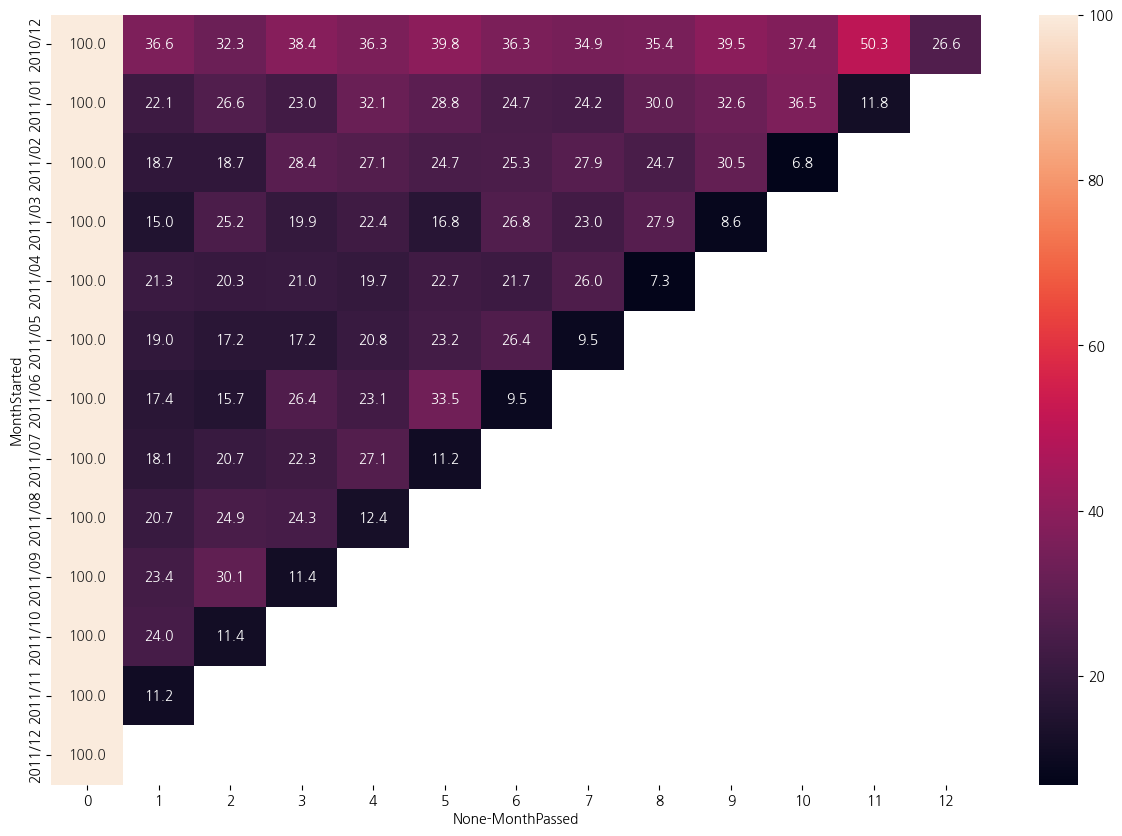

In [164]:
plt.figure(figsize=(15,10))
xticks = np.arange(0,13)
yticks = ["2010/12","2011/01","2011/02","2011/03","2011/04","2011/05","2011/06","2011/07","2011/08","2011/09","2011/10","2011/11","2011/12"]
sns.heatmap(cohort_df_pct, annot=True, fmt=".1f", yticklabels=yticks, xticklabels=xticks);

In [ ]:
# 시간에 따른 구매자 수
order_by_hour = retail_df_new.set_index("InvoiceDate").groupby(lambda date:date.hour)['CustomerID'].count()
order_by_hour

InvoiceDate
6         1
7       379
8      8690
9     21944
10    37997
11    49084
12    72065
13    64026
14    54118
15    45369
16    24089
17    13071
18     2928
19     3321
20      802
Name: CustomerID, dtype: int64

In [167]:
def half_an_hour(date):
    minute = ":00"
    if date.minute > 30:
        minute= ":30"
        
    hour = str(date.hour)
    if date.hour < 10 : 
        hour = "0"+ hour
    
    return hour + minute

In [168]:
order_by_hour_half = retail_df_new.set_index("InvoiceDate").groupby(half_an_hour)['CustomerID'].count()
order_by_hour_half

InvoiceDate
06:00        1
07:30      379
08:00     3145
08:30     5545
09:00     9364
09:30    12580
10:00    16950
10:30    21047
11:00    18925
11:30    30159
12:00    37174
12:30    34891
13:00    31131
13:30    32895
14:00    26958
14:30    27160
15:00    24227
15:30    21142
16:00    14316
16:30     9773
17:00     8889
17:30     4182
18:00     1715
18:30     1213
19:00     1534
19:30     1787
20:00      802
Name: CustomerID, dtype: int64

In [ ]:
# 사용자별 어느 시간에 가장 많이 주문했는가? 개인화된 서비스 제공함